> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on GitHub
> - ▶️ Demo: [try this model in action](https://trekhleb.github.io/machine-learning-experiments)

Inspired by [Learn to Add Numbers with an Encoder-Decoder LSTM Recurrent Neural Network](https://machinelearningmastery.com/learn-add-numbers-seq2seq-recurrent-neural-networks/) article.

In [1]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
# %tensorflow_version 2.x

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import random
from math import sqrt

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.6
Tensorflow version: 2.1.0
Keras version: 2.2.4-tf


In [3]:
batch_size=100
max_num = 100
sequence_length=2

In [4]:
def generate_dataset(batch_size=50, sequence_length=2, max_num=100):
    # Initial dataset states.
    X = []
    Y = []
    
    # Generating sums.
    for i in range(batch_size):
        sequence = [random.randint(1, max_num) for _ in range(sequence_length)]
        X.append(sequence)
        Y.append(sum(sequence))
    
    # Convert to float.    
    X = np.array(X).astype('float')
    Y = np.array(Y).astype('float')
    
    return X, Y

In [5]:
def normalize(np_arr, max_val):
    return np_arr / max_val

def denormalize(np_arr, max_val):
    return np.around(np_arr * max_val)

In [6]:
def preview_dataset(X, Y, num_to_print=10):
    for sequence, label in list(zip(X, Y))[:num_to_print]:
        print("{} = {}".format(sequence, label))
    print('...')

In [7]:
x_train, y_train = generate_dataset(
    batch_size=batch_size,
    sequence_length=sequence_length,
    max_num=max_num
)

preview_dataset(x_train, y_train)

[59. 61.] = 120.0
[53. 68.] = 121.0
[46. 74.] = 120.0
[89. 54.] = 143.0
[88. 63.] = 151.0
[13. 33.] = 46.0
[15. 58.] = 73.0
[88. 77.] = 165.0
[19. 49.] = 68.0
[50. 25.] = 75.0
...


In [8]:
norm_x_train = normalize(x_train, max_num)
norm_y_train = normalize(y_train, max_num)

preview_dataset(norm_x_train, norm_y_train)

[0.59 0.61] = 1.2
[0.53 0.68] = 1.21
[0.46 0.74] = 1.2
[0.89 0.54] = 1.43
[0.88 0.63] = 1.51
[0.13 0.33] = 0.46
[0.15 0.58] = 0.73
[0.88 0.77] = 1.65
[0.19 0.49] = 0.68
[0.5  0.25] = 0.75
...


In [9]:
denorm_x_train = denormalize(norm_x_train, max_num)
denorm_y_train = denormalize(norm_y_train, max_num)

preview_dataset(denorm_x_train, denorm_y_train)

[59. 61.] = 120.0
[53. 68.] = 121.0
[46. 74.] = 120.0
[89. 54.] = 143.0
[88. 63.] = 151.0
[13. 33.] = 46.0
[15. 58.] = 73.0
[88. 77.] = 165.0
[19. 49.] = 68.0
[50. 25.] = 75.0
...


In [10]:
shaped_x_train = norm_x_train.reshape(batch_size, sequence_length, 1)

print(shaped_x_train[:5], '\n...')

[[[0.59]
  [0.61]]

 [[0.53]
  [0.68]]

 [[0.46]
  [0.74]]

 [[0.89]
  [0.54]]

 [[0.88]
  [0.63]]] 
...


In [11]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(
    units=16,
    input_shape=(sequence_length, 1),
#     return_sequences=True
))

# model.add(tf.keras.layers.LSTM(
#     units=8,
# ))

model.add(tf.keras.layers.Dense(
    units=1,
))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1152      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


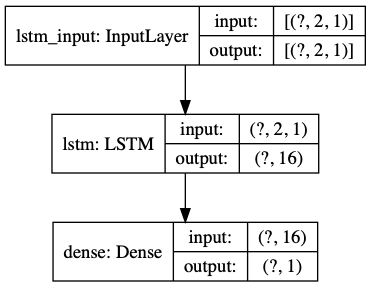

In [13]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [14]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.mean_squared_error
)

In [15]:
epochs_num = 200

history = model.fit(
    x=shaped_x_train,
    y=norm_y_train,
    epochs=epochs_num,
    validation_split=0.8
)

Train on 19 samples, validate on 81 samples
Epoch 1/200
19/19 [==============================] - 2s 97ms/sample - loss: 1.2123 - val_loss: 1.3781
Epoch 2/200
19/19 [==============================] - 0s 713us/sample - loss: 1.2025 - val_loss: 1.3673
Epoch 3/200
19/19 [==============================] - 0s 1ms/sample - loss: 1.1927 - val_loss: 1.3565
Epoch 4/200
19/19 [==============================] - 0s 2ms/sample - loss: 1.1830 - val_loss: 1.3458
Epoch 5/200
19/19 [==============================] - 0s 1ms/sample - loss: 1.1733 - val_loss: 1.3352
Epoch 6/200
19/19 [==============================] - 0s 944us/sample - loss: 1.1637 - val_loss: 1.3246
Epoch 7/200
19/19 [==============================] - 0s 889us/sample - loss: 1.1542 - val_loss: 1.3142
Epoch 8/200
19/19 [==============================] - 0s 1ms/sample - loss: 1.1447 - val_loss: 1.3037
Epoch 9/200
19/19 [==============================] - 0s 1ms/sample - loss: 1.1353 - val_loss: 1.2934
Epoch 10/200
19/19 [====================

Epoch 81/200
19/19 [==============================] - 0s 1ms/sample - loss: 0.4771 - val_loss: 0.5581
Epoch 82/200
19/19 [==============================] - 0s 2ms/sample - loss: 0.4674 - val_loss: 0.5472
Epoch 83/200
19/19 [==============================] - 0s 2ms/sample - loss: 0.4578 - val_loss: 0.5362
Epoch 84/200
19/19 [==============================] - 0s 1ms/sample - loss: 0.4481 - val_loss: 0.5253
Epoch 85/200
19/19 [==============================] - 0s 2ms/sample - loss: 0.4384 - val_loss: 0.5144
Epoch 86/200
19/19 [==============================] - 0s 2ms/sample - loss: 0.4288 - val_loss: 0.5034
Epoch 87/200
19/19 [==============================] - 0s 1ms/sample - loss: 0.4192 - val_loss: 0.4925
Epoch 88/200
19/19 [==============================] - 0s 1ms/sample - loss: 0.4096 - val_loss: 0.4817
Epoch 89/200
19/19 [==============================] - 0s 1ms/sample - loss: 0.4000 - val_loss: 0.4708
Epoch 90/200
19/19 [==============================] - 0s 1ms/sample - loss: 0.3905

Epoch 160/200
19/19 [==============================] - 0s 723us/sample - loss: 0.0418 - val_loss: 0.0524
Epoch 161/200
19/19 [==============================] - 0s 839us/sample - loss: 0.0416 - val_loss: 0.0519
Epoch 162/200
19/19 [==============================] - 0s 2ms/sample - loss: 0.0414 - val_loss: 0.0515
Epoch 163/200
19/19 [==============================] - 0s 2ms/sample - loss: 0.0412 - val_loss: 0.0511
Epoch 164/200
19/19 [==============================] - 0s 1ms/sample - loss: 0.0410 - val_loss: 0.0508
Epoch 165/200
19/19 [==============================] - 0s 1ms/sample - loss: 0.0409 - val_loss: 0.0505
Epoch 166/200
19/19 [==============================] - 0s 2ms/sample - loss: 0.0408 - val_loss: 0.0502
Epoch 167/200
19/19 [==============================] - 0s 1ms/sample - loss: 0.0407 - val_loss: 0.0499
Epoch 168/200
19/19 [==============================] - 0s 1ms/sample - loss: 0.0405 - val_loss: 0.0497
Epoch 169/200
19/19 [==============================] - 0s 1ms/sample 

In [16]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Validation set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

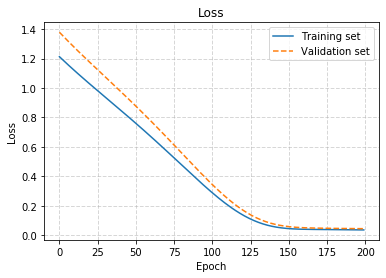

In [17]:
render_training_history(history)

In [18]:
x_test, y_test = generate_dataset(
    batch_size=batch_size,
    sequence_length=sequence_length,
    max_num=max_num
)

norm_x_test = normalize(x_test, max_num)
norm_y_test = normalize(y_test, max_num)

shaped_x_test = norm_x_test.reshape(batch_size, sequence_length, 1)

preview_dataset(norm_x_test, norm_y_test)

[0.67 0.96] = 1.63
[0.02 0.83] = 0.85
[0.33 0.5 ] = 0.83
[0.67 0.57] = 1.24
[0.88 0.92] = 1.8
[0.05 0.74] = 0.79
[0.74 0.56] = 1.3
[0.57 0.54] = 1.11
[0.69 0.98] = 1.67
[0.9  0.57] = 1.47
...


In [19]:
predictions = model.predict(shaped_x_test)

print(predictions[:10], '\n...')

[[1.2975271 ]
 [0.85919416]
 [0.92326665]
 [1.156253  ]
 [1.4143993 ]
 [0.845084  ]
 [1.1961373 ]
 [1.0832995 ]
 [1.3170763 ]
 [1.2997848 ]] 
...


In [20]:
num = 10
for sequence, label, prediction in zip(norm_x_test[:num], norm_y_test[:num], predictions[:num, 0]):
    print('{} = {:3.0f} (prediction: {:3.0f}, err: {:3.0f})'.format(
        denormalize(sequence, max_num),
        denormalize(label, max_num),
        denormalize(prediction, max_num),
        denormalize(label, max_num) - denormalize(prediction, max_num)
    ))

[67. 96.] = 163 (prediction: 130, err:  33)
[ 2. 83.] =  85 (prediction:  86, err:  -1)
[33. 50.] =  83 (prediction:  92, err:  -9)
[67. 57.] = 124 (prediction: 116, err:   8)
[88. 92.] = 180 (prediction: 141, err:  39)
[ 5. 74.] =  79 (prediction:  85, err:  -6)
[74. 56.] = 130 (prediction: 120, err:  10)
[57. 54.] = 111 (prediction: 108, err:   3)
[69. 98.] = 167 (prediction: 132, err:  35)
[90. 57.] = 147 (prediction: 130, err:  17)


In [21]:
expected = [denormalize(y, max_num) for y in norm_y_test]
predicted = [denormalize(y, max_num) for y in predictions[:, 0]]

print('Expected:\n', expected[:10])
print('Predicted:\n', predicted[:10])

Expected:
 [163.0, 85.0, 83.0, 124.0, 180.0, 79.0, 130.0, 111.0, 167.0, 147.0]
Predicted:
 [130.0, 86.0, 92.0, 116.0, 141.0, 85.0, 120.0, 108.0, 132.0, 130.0]


In [22]:
def mean_squared_error(expected, predicted):
    return np.square(np.array(expected) - np.array(predicted)).mean()

In [23]:
rmse = sqrt(mean_squared_error(expected, predicted))
print('RMSE: {:.2f}'.format(rmse))

RMSE: 21.19
